#### Import the Image and Turn it into Gray Scale

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Define the image_path to get the image
image_path = "C:/Users/ASUS/Desktop/423-part3/0076.jpg"

# Turn the image into grayscale and form a matrix of pixel values
original_data= cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
print(original_data)

[[194 182 171 ... 170 165 209]
 [214 205 194 ... 165 177 210]
 [198 198 197 ... 173 197 237]
 ...
 [217 209 196 ... 187 220 225]
 [200 197 189 ... 173 197 184]
 [203 201 195 ... 122 161 172]]


#### Calculate Control Limits (Row)

In [2]:
# Function to calculate mean, standard deviation, and control limits for each row
def calculate_control_limits_per_row(data):
    num_rows, num_cols = data.shape
    row_means = np.mean(data, axis=1)
    row_std_devs = np.std(data, axis=1)

    # Calculate control limits for each row
    control_limits = {
        f"Row {i + 1}": {
            "Upper Limit": row_means[i] + 2 * row_std_devs[i],
            "Lower Limit": row_means[i] - 2 * row_std_devs[i]
        } for i in range(num_rows)
    }

    return control_limits

#### Calculate Control Limits (Column)

In [3]:
# Function to calculate mean, standard deviation, and control limits for each column
def calculate_control_limits_per_column(data):
    num_rows, num_cols = data.shape
    col_means = np.mean(data, axis=0)
    col_std_devs = np.std(data, axis=0)

    # Calculate control limits for each column
    control_limits = {
        f"Column {j + 1}": {
            "Upper Limit": col_means[j] + 2 * col_std_devs[j],
            "Lower Limit": col_means[j] - 2 * col_std_devs[j]
        } for j in range(num_cols)
    }

    return control_limits

#### Find ooc points for rows

In [4]:
# Function to find out-of-control points for each row
def find_out_of_control_points_per_row(data, control_limits):
    out_of_control_points = {}

    for i, (row, limits) in enumerate(control_limits.items()):
        upper_limit = limits['Upper Limit']
        lower_limit = limits['Lower Limit']

        # Find indices of points outside the control limits for rows
        out_of_control_indices = np.where((data[i, :] > upper_limit) | (data[i, :] < lower_limit))[0]

        # Save the indices for each row
        out_of_control_points[row] = out_of_control_indices

    return out_of_control_points

#### Find ooc points for columns

In [5]:
# Function to find out-of-control points for each column
def find_out_of_control_points_per_column(data, control_limits):
    out_of_control_points = {}

    for j, (col, limits) in enumerate(control_limits.items()):
        upper_limit = limits['Upper Limit']
        lower_limit = limits['Lower Limit']

        # Find indices of points outside the control limits for columns
        out_of_control_indices = np.where((data[:, j] > upper_limit) | (data[:, j] < lower_limit))[0]

        # Save the indices for each column
        out_of_control_points[col] = out_of_control_indices

    return out_of_control_points

#### Set ooc points to black for rows

In [6]:
# Function to set out-of-control points to black for rows
def set_out_of_control_points_to_black_per_row(data, out_of_control_points):
    modified_data = np.copy(data)

    for row, indices in out_of_control_points.items():
        row_index = int(row.split()[1]) - 1
        modified_data[row_index, indices] = 0

    return modified_data


#### Set ooc points to black for columns

In [7]:
# Function to set out-of-control points to black for columns
def set_out_of_control_points_to_black_per_column(data, out_of_control_points):
    modified_data = np.copy(data)

    for col, indices in out_of_control_points.items():
        col_index = int(col.split()[1]) - 1
        modified_data[indices, col_index] = 0

    return modified_data

In [8]:
# Call the function to get the modified data for rows
control_limits_per_row = calculate_control_limits_per_row(original_data)
out_of_control_points_per_row = find_out_of_control_points_per_row(original_data, control_limits_per_row)
modified_data_per_row = set_out_of_control_points_to_black_per_row(original_data, out_of_control_points_per_row)


In [9]:
# Call the function to get the modified data for columns
control_limits_per_column = calculate_control_limits_per_column(original_data)
out_of_control_points_per_column = find_out_of_control_points_per_column(original_data, control_limits_per_column)
modified_data_per_column = set_out_of_control_points_to_black_per_column(original_data, out_of_control_points_per_column)

#### Plot the datasets

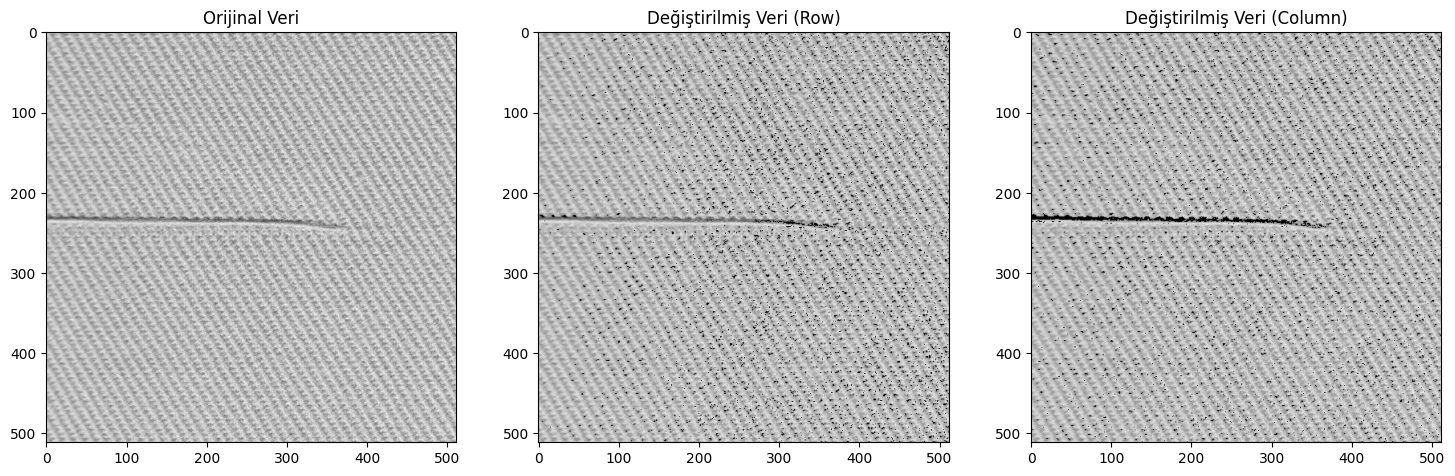

In [10]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_data, cmap='gray', vmin=0, vmax=255)
plt.title("Orijinal Veri")

plt.subplot(1, 3, 2)
plt.imshow(modified_data_per_row, cmap='gray', vmin=0, vmax=255)
plt.title("Değiştirilmiş Veri (Row)")

plt.subplot(1, 3, 3)
plt.imshow(modified_data_per_column, cmap='gray', vmin=0, vmax=255)
plt.title("Değiştirilmiş Veri (Column)")

plt.show()